In [ ]:
# LABORATORIUM 5 - ZADANIE 2 (na ocenę 5)
# IMIĘ i NAZWISKO: MICHAŁ WÓJCIK

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from pymoo.algorithms.soo.nonconvex.pso import PSO
from pymoo.core.problem import Problem
from pymoo.optimize import minimize
from pymoo.core.callback import Callback

In [77]:
# Klasa problemu Levy z określonymi parametrami oraz wzorem
class Levy(Problem):
    def __init__(self, n_var=10):
         super().__init__(n_var=n_var, n_obj=1, xl=-10, xu=10, type_var=np.double)
        
    def _evaluate(self, X, out, *args, **kwargs):
        w = 1 + (X - 1) / 4
    
        term1 = np.sin(np.pi * w[:, 0]) ** 2
        term2 = np.sum((w[:, :-1] - 1) ** 2 * (1 + 10 * np.sin(np.pi * w[:, :-1] + 1) ** 2), axis=1)
        term3 = (w[:, -1] - 1) ** 2 * (1 + np.sin(2 * np.pi * w[:, -1]) ** 2)
    
        out["F"] = term1 + term2 + term3

In [78]:
# Callback do przechowywanie historii
class MyCallback(Callback):
    def __init__(self):
        super().__init__()
        self.history = []

    def notify(self, algorithm):
        self.history.append(algorithm.pop.get("F").min())
    
callback = MyCallback()

In [79]:
pop_size, w, c1, c2 = 100, 0.5, 1.5, 1.5

algorithm = PSO(pop_size=pop_size,
                w=w,
                c1=c1,
                c2=c2)
res = minimize(Levy(),
               algorithm,
               seed=1,
               callback=callback,
               verbose=True)

n_gen  |  n_eval  |    f     |    S    |    w    |    c1    |    c2    |     f_avg     |     f_min    
     1 |      100 |        - |       - |  0.5000 |  1.50000 |  1.50000 |  1.200783E+02 |  2.634292E+01
     2 |      200 |  0.10196 |       3 |  0.4650 |  1.53319 |  1.53319 |  6.664096E+01 |  1.537721E+01
     3 |      300 |  0.13143 |       3 |  0.4841 |  1.57074 |  1.57074 |  3.254537E+01 |  6.7089786434
     4 |      400 |  0.16322 |       3 |  0.5047 |  1.60226 |  1.60226 |  1.557382E+01 |  3.0407856025
     5 |      500 | -6.8E-03 |       3 |  0.3957 |  1.64065 |  1.64065 |  9.1982567327 |  1.5697336336
     6 |      600 | -1.1E-02 |       3 |  0.3933 |  1.66786 |  1.66786 |  4.4393080076 |  0.8282073117
     7 |      700 | -9.3E-03 |       3 |  0.3942 |  1.69351 |  1.69351 |  3.4285770586 |  0.7860540071
     8 |      800 | -8.7E-03 |       3 |  0.3946 |  1.72893 |  1.72893 |  2.4569116723 |  0.5485373007
     9 |      900 |  0.01959 |       3 |  0.4123 |  1.77608 |  1.77608 | 

In [80]:
print(f"Optymalne rozwiązanie dla konfiguracji pop_size={pop_size}, w={w}, c1={c1}, c2={c2}: \nX = %s\nF = %s" % (res.X, res.F))

Optymalne rozwiązanie dla konfiguracji pop_size=100, w=0.5, c1=1.5, c2=1.5: 
X = [0.99998609 0.99991656 1.00000187 0.99989982 1.00007781 1.00002002
 0.99994103 1.00000275 1.00004375 1.00050336]
F = [3.06253402e-08]


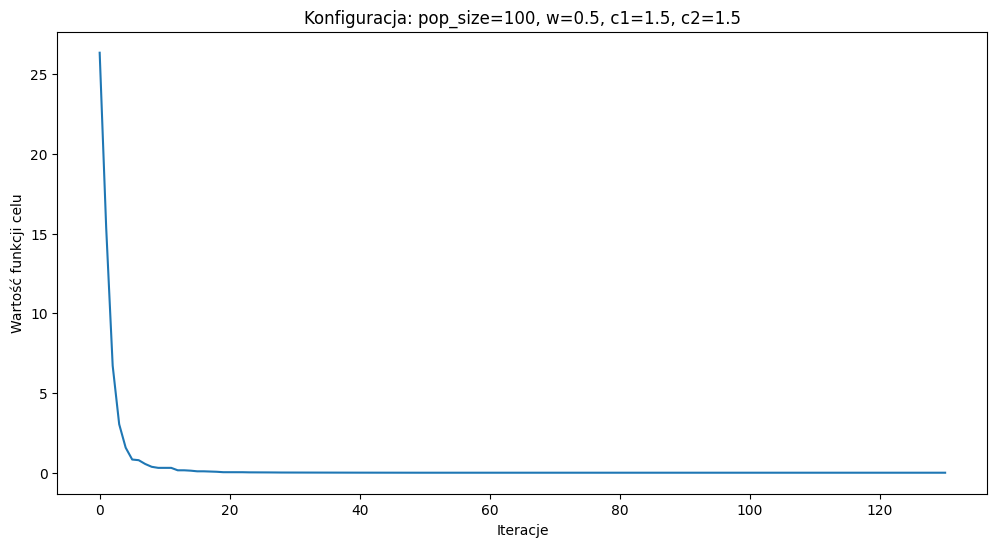

In [81]:
# Wyznaczanie wykresu zbieżności
plt.figure(figsize=(12, 6))
plt.plot(callback.history)
plt.title(f"Konfiguracja: pop_size={pop_size}, w={w}, c1={c1}, c2={c2}")
plt.xlabel("Iteracje")
plt.ylabel("Wartość funkcji celu")
plt.show()